[^ gor: Uvod](00_uvod.ipynb)

# Zaporedja
Zaporedje je funkcija iz naravnih števil v neko množico $\mathcal{Z}$.

$$ a:\mathbb{N}\to\mathcal{Z}$$

 * $n$-ti **člen zaporedja** $a_n$ je vrednost $a(n)$ funkcije $a$ v naravnem številu $n$
 * pri Matematiki bo $\mathcal{Z}$ vedno $\mathbb{R}$, se pravi členi zaporedja  bodo **realna števila**
 * Zaporedje velikokrat podamo s prvimi nekaj členi in pustimo bralcu, da ugane splošni člen
 $$a_0,a_1,a_2,a_3,\ldots$$
 $$1,\frac{1}{2},\frac{2}{3},\frac{3}{4},\ldots$$


## Primer
Dano je zaporedje 
$$a_n=\frac{n^{10}}{2^n}.$$
 
 * izračunaj in izpiši prvih nekaj členov in nariši graf
 * pokaži, da je zaporedje od nekega $n$ naprej padajoče
 * izračunaj limito

In [1]:
# zaporedje definiramo kot funkcijo
a = lambda n: n**10/2**n
for n in range(10):
    print("%f" % a(n))

0.000000
0.500000
256.000000
7381.125000
65536.000000
305175.781250
944784.000000
2206837.882812
4194304.000000
6810125.783203


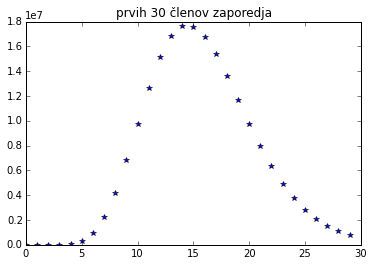

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
n = range(30)
plt.plot(n,[a(k) for k in n],'*')
#plt.semilogy(n,[a(k) for k in n],'*')
plt.title("prvih %d členov zaporedja" % len(n))
plt.show()

Zaporedje je padajoče, če je naslednji člen manjši od prejšnjega: $a_n>a_{n+1}$. Iz grafa vidimo, da je od približno 15 člena naprej zaporedje padajoče. Poiščimo $n$ pri katerem se to zgodi še s programom. 

In [14]:
n = 0
while a(n)<a(n+1):
    n += 1
n

14

Graf in program seveda nista dokaz, da je zaporedje padajoče za vse $n>14$. Lahko pa to preverimo, tako da rešimo neenačbo
$$ a_n>a_{n+1}$$
$$ \frac{n^{10}}{2^n}>\frac{(n+1)^{10}}{2^{n+1}}$$

In [21]:
import sympy as sym
sym.init_printing() # lepši izpis formul
from sympy.solvers.inequalities import solve_univariate_inequality
from sympy import Symbol

n = Symbol('n', real=True) #  x simbol, ki je realno število
neenacba = a(n) > a(n+1)
sym.simplify(neenacba)

In [31]:
solve_univariate_inequality(neenacba,x)

TypeError: cannot determine truth value of
RootOf(n**10 - 10*n**9 - 45*n**8 - 120*n**7 - 210*n**6 - 252*n**5 - 210*n**4 - 120*n**3 - 45*n**2 - 10*n - 1, 1) < RootOf(n**10 - 10*n**9 - 45*n**8 - 120*n**7 - 210*n**6 - 252*n**5 - 210*n**4 - 120*n**3 - 45*n**2 - 10*n - 1, 0)

Neenačba je previsoke stopnje, zato je SymPy ne zna rešiti. Rešitev lahko poiščemo sami, tako da najprej rešimo enačbo. Nato določimo, na katerih intervalih neeančba velja.

In [38]:
from sympy.solvers import solve
resitve = solve(neenacba.lhs-neenacba.rhs)
resitve

In [41]:
[float(x) for x in resitve]

In [49]:
neenacba.subs(n,15) # v enačbo vstavimo n=15

## Rekurzivna zaporedja
Zaporedje lahko podamo tudi z rekurzivno formulo 
$$a_{n+1}=f(a_n)$$
in prvim členom
$a_0$. 


### Primer
Zaporedje je dano z rekurzivno formulo 
$$a_{n+1}=1+\frac{1}{a_n}$$
in začetnim členom $a_0=\frac{1}{2}$. 

 * Nariši nekaj členov zaporedja
 * Pokaži, da sta zaporedji $a_{2n}$ in $a_{2n+1}$ monotoni in omejeni.
 * Poišči limito.

In [25]:
# narišemo nekaj prvih členov
n0 = 20
a = n0*[0]
a[0] = 1/2
for n in range(n0-1):
    a[n+1] = 1+1./a[n]
print("Prvih %d členov zaporedja\n" % n0)
print((n0*"%0.8f\n")%tuple(a))

Prvih 20 členov zaporedja

0.50000000
3.00000000
1.33333333
1.75000000
1.57142857
1.63636364
1.61111111
1.62068966
1.61702128
1.61842105
1.61788618
1.61809045
1.61801242
1.61804223
1.61803084
1.61803519
1.61803353
1.61803416
1.61803392
1.61803401



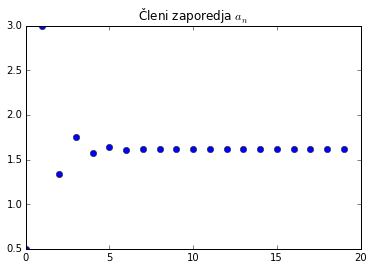

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(range(n0),a,'o')
plt.title("Členi zaporedja $a_n$")
plt.show()

Prvih nekaj členov nam razkrije, da je zaporedje lihih členov $a_{2n+1}$ padajoče, zaporedje sodih členov $a_{2n}$ pa naraščajoče. Da bi to preverili/dokazali, zapišimo rekurzivno enačbo, ki ji zadoščata podzaporedji $a_{2n+1}$ in $a_{2n}$.

Rekurzivna enačba 

$$a_{n+1}=f(a_n)=1+\frac{1}{a_n}$$ 

je določena s funkcijo $f(x)=1+\frac{1}{x}$. Za zaporedji sodih in lihih členov $a_{2n}$ in $a_{2n+1}$ dobimo rekurzivni formuli, če dvakrat uporabimo funkcijo $f$

$$a_{2(n+1)}=f(a_{2n+1})=f(f(a_{2n}))$$

in 

$$a_{2(n+1)+1} = f(f(a_{2n+1}))$$

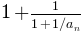

In [5]:
import sympy as sym
sym.init_printing()
# zaporedje je podano s funkcijo f(x) = 1+1/x
f = lambda x: 1+1/x
n = sym.Symbol('n')
a_n = sym.Symbol('a_n')
f(f(a_n))

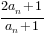

In [55]:
sym.simplify(f(f(a_n)))

Zaporedji lihih členov in sodih členov zadoščata rekurzivni formuli
$$a_{n+2}=\frac{2 a_{n} + 1}{a_{n} + 1}.$$
Zaporedje $a_{2n}$ bo naraščalo, če bo veljalo
$$a_{2n+2} > a_{2n}$$
oziroma
$$\frac{2 a_{2n} + 1}{a_{2n} + 1} > a_{2n}.$$



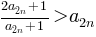

In [15]:
ff = lambda x: f(f(x))
a_2n = sym.Symbol('a_2n')
sym.simplify(ff(a_2n) > a_2n)

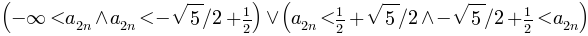

In [16]:
sym.solve_univariate_inequality(ff(a_2n)>a_2n,a_2n)

Zaporedje sodih členov $a_{2n}$ bo **padajoče**, če so členi
$$a_{2n}>\frac{1}{2}+\frac{\sqrt{5}}{2}$$
in **naraščajoče**, če so členi
$$a_{2n}<\frac{1}{2}+\frac{\sqrt{5}}{2}.$$
Podobno velja za zaporedje lihih členov $a_{2n+1}$.

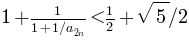

In [17]:
neenacba = ff(a_2n)<1/sym.Integer(2)+sym.sqrt(sym.Integer(5))/2
neenacba

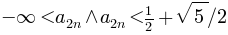

In [18]:
sym.solve_univariate_inequality(neenacba,a_2n)

Vidimo, da je 
$$a_{2n}<\frac{1}{2}+\frac{\sqrt{5}}{2}\implies a_{2n+2}<\frac{1}{2}+\frac{\sqrt{5}}{2}.$$
Po indukciji sklepamo, da so vsi členi  $a_{2n}<\frac{1}{2}+\frac{\sqrt{5}}{2}$, če to velja za prvi člen 
$$a_0= \frac{1}{2}<\frac{1}{2}+\frac{\sqrt{5}}{2}.$$
Ker so vsi členi  $a_{2n}<\frac{1}{2}+\frac{\sqrt{5}}{2}$, je zaporedje sodih členov naraščajoče. Podobno dokažemo, da je zaporedje lihih členov $a_{2n+1}$ padajoče.

## Limita
Limita $a = \lim_{n\to\infty} a_n$ rekurzivnega zaporedja zadošča rekurzivni enačbi
$$ a = f(a). $$
Res! 
\begin{eqnarray}
a_{n+1} & = &f(a_n)\\
\lim_{n\to\infty} a_{n+1} &=& \lim_{n\to\infty} f(a_n)\\
\lim_{n\to\infty} a_{n} &=& f\left(\lim_{n\to\infty} a_n\right)\\
a &=&f(a)
\end{eqnarray}

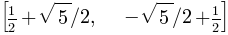

In [21]:
resitve = sym.solve(sym.Eq(a_n,f(a_n)),a_n)
resitve

Rešitvi sta nam že poznani iz predhodne analize. Limita je očitno enaka prvi rešitvi $$\frac{1}{2}+\frac{\sqrt{5}}{2},$$
saj je $a_n>0$.

In [23]:
resitve[0].evalf() # numerični približek za limito se ujema s prej izračunanimi členi zaporedja

## Grafična predstavitev rekurzivnega zaporedja
Rekurzivno podano zaporedje z rekurzivno formulo
$$a_{n+1}=f(a_n)$$
si lahko predstavljamo tudi grafično. Limita zaporedja $a_n$ je rešitev enačbe
$$a=f(a)$$
Grafično prestavlja limita presečišče grafa funkcije $y=f(x)$ in simetrale lihih kvadrantov $y=x$.

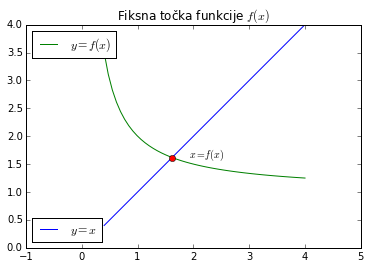

In [78]:
t=np.linspace(0.4,4)
l1, = plt.plot(t,t,label="$y=x$")
l2, = plt.plot(t,f(t),label="$y=f(x)$")
x = sym.Symbol('x')
resitve = sym.solve(sym.Eq(x,f(x)),x) # limita/rešitev enačbe x=f(x)
plt.plot(resitve[0],f(resitve[0]),'o')
# oznake in legenda
plt.annotate("$x=f(x)$",xy=(resitve[0],resitve[0]),xytext=(resitve[0]+0.3,resitve[0]))
plt.title("Fiksna točka funkcije $f(x)$")
legend1 = plt.legend(handles=[l1],loc=3)
plt.gca().add_artist(legend1)
plt.legend(handles=[l2],loc=2)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

Zaporedje konstruiramo tako, da 

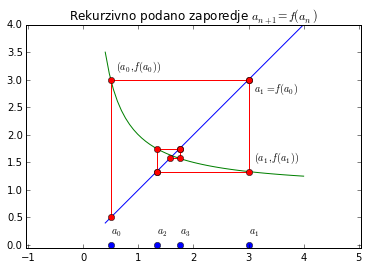

In [70]:
import numpy as np
import matplotlib.animation as animation
t=np.linspace(0.4,4)
plt.plot(t,t)
plt.plot(t,f(t))
plt.title("Rekurzivno podano zaporedje $a_{n+1}=f(a_n)$")
for i in range(4):
    plt.plot(a[i],0,'ob')
    plt.annotate('$a_%d$'%i,xy=(a[i], 0), xytext=(a[i], 0.2))
    plt.plot([a[i],a[i],f(a[i])],[a[i],f(a[i]),f(a[i])],'-ro')
for i in range(2):
    plt.annotate('$(a_%d,f(a_%d))$'%(i,i),xy=(a[i], f(a[i])), xytext=(a[i]+0.1, f(a[i])+0.2))
plt.annotate('$a_1=f(a_0)$',xy=(a[1], a[1]), xytext=(a[1]+0.1, a[1]-0.2))
plt.ylim(-0.05,4)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

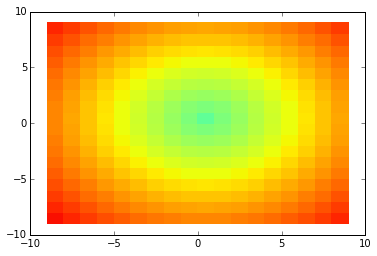

In [81]:
import matplotlib.animation as animation
fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
    blit=True)
im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()

## Dodatek: Zaprtje za rekurzivno zaporedje
[Zaprtje (ang. closure)](https://en.wikipedia.org/wiki/Closure_%28computer_programming%29) omogoča, da funkciji dodamo  *„spomin“*, ne da bi pri tem uporabili globalne spremenljivke. Funkcijo, ki računa rekurzivno zaporedje, bomo popravili, da si bo zapomnila že izračunane člene.

In [1]:
def gen_rekurzijo(a0,fun):
    """Funkcija definira rekurzivno zaporedje z rekurzivno formulo
        a(n+1)=fun(a(n)) in začetnim členom 
        a(0)=a0"""
    zaporedje = [a0]
    def a(n):
        if len(zaporedje)-1<n: # če člen zaporedja še ni izračunam
            vrednost = fun(a(n-1)) # rekurzivna formula
            zaporedje.append(vrednost) # shranimo vrednost za kasneje
            return vrednost
        else:
            print("Že izračunani členi:", zaporedje)
            return zaporedje[n] # člen a(n) je že izračunan
    return a

### Primer
Zaporedje za računanje $\sqrt{2}$ je dano z rekurzivno formulo
$$a_{n+1}=\frac{1}{2}\left(a_n+\frac{2}{a_n}\right).$$
Izračunaj $\sqrt{2}$ na 12 decimalk natančno.

In [2]:
koren2 = gen_rekurzijo(2,lambda x:(x+2/x)/2)
koren2(1)
koren2(3)

Že izračunani členi: [2]
Že izračunani členi: [2, 1.5]


1.4142156862745097

In [3]:
n = 0
while abs(koren2(n)**2-2)>1e-12:
    n += 1
print("n: %d, koren: %1.12f" % (n,koren2(n)))

Že izračunani členi: [2, 1.5, 1.4166666666666665, 1.4142156862745097]
Že izračunani členi: [2, 1.5, 1.4166666666666665, 1.4142156862745097]
Že izračunani členi: [2, 1.5, 1.4166666666666665, 1.4142156862745097]
Že izračunani členi: [2, 1.5, 1.4166666666666665, 1.4142156862745097]
Že izračunani členi: [2, 1.5, 1.4166666666666665, 1.4142156862745097]
Že izračunani členi: [2, 1.5, 1.4166666666666665, 1.4142156862745097, 1.4142135623746899]
Že izračunani členi: [2, 1.5, 1.4166666666666665, 1.4142156862745097, 1.4142135623746899, 1.414213562373095]
n: 5, koren: 1.414213562373


[>> naprej: vrste](02b_vrste.ipynb)

In [ ]:
import disqus
%reload_ext disqus
%disqus matpy